Scripts para fazer um teste na biblioteca fci, reproduzindo o artigo>
(Explaining the behavior of black-box prediction algorithms with causal learning )

Com o objetivo de gerar os grafos de causalidade, fizemos um teste utilizando o experimento com formas geométricas utilizados nos artigos do trabalho.


In [16]:
# importando bibliotecas:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# parametros para geracao do dataset:
# numero de pixels da imagem npi x npi
npi= 120
# numero de amostras n
nAmostras = 3000
# espessura das linhas
esp=3
# Raio do Circulo    
r=max(3,int(round(npi/25)))

In [17]:
# funcao para adicionar quadrados na imagem
def add_quadrado(imagem,npi,esp,t_max=int(npi/2)):
    # imagem = numero em um dos lados da imagem
    # t_max= tamanho maximo do retangulo
    if t_max>= npi:
        t_max=npi-1
        
    # gerando o tamanho do quadrado:
    t=np.random.randint(1,npi-t_max)
    # gerando a posicao do quadrado
    px=np.random.randint(0,npi-t-esp)
    py=np.random.randint(0,npi-t-esp)
    imagem[px:px+t,py:py+esp]=1
    imagem[px:px+t,py+t:py+esp+t]=1
    imagem[px:px+esp,py:py+t]=1
    imagem[px+t:px+t+esp,py:py+t+esp]=1
    return imagem

# funcao para gerar ruido

def add_ruido(imagem,npi):
    # quantidade de pixels ruidosos
    nr=np.random.randint(0,npi)
    #posicao dos pixels ruidosos
    for i in range(nr):
        px=np.random.randint(0,npi)
        py=np.random.randint(0,npi)
        imagem[px,py]=1
    return imagem
        
# funcao para adicionar barras verticais na imagem

def add_barra_horizontal(imagem,npi,esp):
    #posicao da barra horizontal
    esp=3
    px = np.random.randint(0,npi-esp)
    #adicionando a barra horizontal
    imagem[px:px+esp,0:npi]=1
    return imagem

# funcao para adicionar barras horizontais na imagem

def add_barra_vertical(imagem,npi,esp):
     #posicao da barra vertical
    py = np.random.randint(0,npi-esp)
    #adicionando a barra vertical
    imagem[0:npi,py:py+esp]=1
    return imagem

# funcao para adicionar circulos na imagem

def add_circulos(imagem,npi,r):
    
    # r=raio do circulo

    # posicao do circulo
    py = np.random.randint(r+1,npi-r-1)
    px = np.random.randint(r+1,npi-r-1)
    #adicionando circulo na imagem 
    for i in range(r):
        for j in range(r):
            if np.sqrt(i**2+j**2)<=r:
                imagem[px+i,py+j]=1
                imagem[px-i,py+j]=1
                imagem[px+i,py-j]=1
                imagem[px-i,py-j]=1        
    return imagem
    

In [18]:
# funcoes para gerar as imagens com formas geometricas
def expit(x):
    return 1/(1+np.exp(-x))

def gera_amostras(npi,esp,r):
    #gerando distribuicoes
    U1=np.random.randint(0,100)/100
    U2=np.random.randint(0,100)/100
    pV=1-U1
    pH=U1
    pC=U2
    V= np.random.binomial(1, pV, size=None)
    H= np.random.binomial(1, pH, size=None)
    C= np.random.binomial(1, pC, size=None)
    pR=expit(0.75*H+0.5*C)
    pY=expit(-0.5+2.5*V+1.75*C)
    R= np.random.binomial(1, pR, size=None)
    Y= np.random.binomial(1, pY, size=None)
    
    # gerando imagem
    imagem=np.zeros((npi,npi))
    imagem=add_ruido(imagem,npi)
    if V==1:
        imagem=add_barra_vertical(imagem,npi,esp)
    if C==1:
        imagem=add_circulos(imagem,npi,r)
    if R==1:
        imagem=add_quadrado(imagem,npi,esp)
    if H==1:
        imagem=add_barra_horizontal(imagem,npi,esp)
    labels={'V':V,'H':H,'C':C,'R':R,'Y':Y}
    return(labels,imagem)

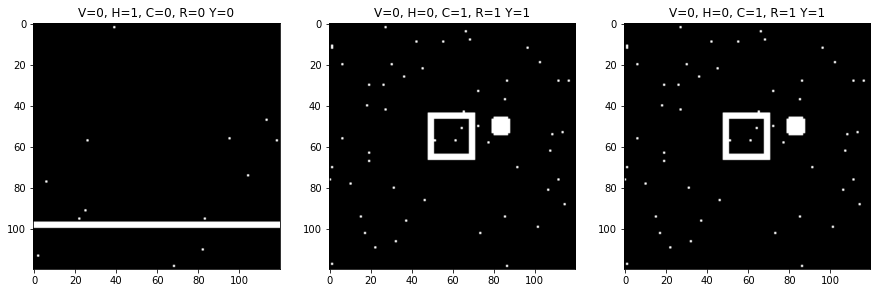

In [14]:
#imagem=np.zeros((npi,npi))
labels1,imagem1=gera_amostras(npi,esp,r)
labels2,imagem2=gera_amostras(npi,esp,r)
labels3,imagem3=gera_amostras(npi,esp,r)

plt.figure(figsize=(15,15))
plt.subplot(1,3,1)
plt.imshow(imagem1,cmap='Greys_r')
titulo="V="+str(labels1['V'])+", H="+str(labels1['H'])+", C="+str(labels1['C'])+", R="+str(labels1['R'])+" Y="+str(labels1['Y'])
plt.title(titulo)
plt.subplot(1,3,2)
plt.imshow(imagem2,cmap='Greys_r')
titulo="V="+str(labels2['V'])+", H="+str(labels2['H'])+", C="+str(labels2['C'])+", R="+str(labels2['R'])+" Y="+str(labels2['Y'])
plt.title(titulo)
plt.subplot(1,3,3)
plt.imshow(imagem2,cmap='Greys_r')
titulo="V="+str(labels2['V'])+", H="+str(labels2['H'])+", C="+str(labels2['C'])+", R="+str(labels2['R'])+" Y="+str(labels2['Y'])
plt.title(titulo)
plt.savefig('AmostrasSintéticas.png',bbox_inches='tight')
plt.show()

In [26]:
#Simulacao
df = pd.DataFrame(columns=('imagem', 'V','H','C','R','Y'))

df = pd.DataFrame(columns=('imagem', 'V','H','C','R','Y'))
labels2=np.zeros((nAmostras,5))
for i in range(nAmostras):
    labels,imagem=gera_amostras(npi,esp,r)
    nomeimage='img_'+str(i+1).zfill(4)
    labels['imagem']=nomeimage
    # adicionando os labels no dataframe
    df_dict = pd.DataFrame([labels])
    df=pd.concat([df, df_dict], ignore_index=True)
    # salvando a imgem
    #np.save(nomeimage+'.npy',imagem)
    labels2[i,0]=labels['V']
    labels2[i,1]=labels['H']
    labels2[i,2]=labels['C']
    labels2[i,3]=labels['R']
    labels2[i,4]=labels['Y']
    

Agora vamos gerar o grafo de causalidade, a exemplo do artigo *Explaining the behavior of black-box prediction algorithms with causal learning*, vamos utilizar o algoritmo FCI, disponível na biblioteca causal-learn. 

In [27]:
from causallearn.search.ConstraintBased.FCI import fci

G, edges = fci(labels2, independence_test_method='kci')

Starting Fast Adjacency Search.



Finishing Fast Adjacency Search.


In [70]:
df2 = pd.DataFrame(columns=('node1', 'term_node1','term_node2','node2'))
dict1={}
dict2={'X1':'V','X2':'H','X3':'C','X4':'R','X5':'Y'}
for i in range(len(edges)):
    dict1['node1']=dict2[edges[i].get_node1().get_name()]
    dict1['node2']=dict2[edges[i].get_node2().get_name()]
    dict1['term_node1']=edges[i].get_endpoint1()
    dict1['term_node2']=edges[i].get_endpoint2()
    df_dict = pd.DataFrame([dict1])
    df2=pd.concat([df2, df_dict], ignore_index=True)

Agora vamos dar uma olhada no grafo

In [71]:
df2

,node1,term_node1,term_node2,node2
0,V,CIRCLE,ARROW,H
1,V,CIRCLE,ARROW,Y
2,H,ARROW,ARROW,R
3,C,CIRCLE,ARROW,R
4,C,CIRCLE,ARROW,Y
